# Name: Tufan Kundu
# Reg no: 24MDT0184
# DA2

# PCA on Iris Dataset

### Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

### Loading the dataset

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_labels = iris.target

## Scaling the dataset

In [4]:
# Standardize the dataset
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)

## performing PCA

In [5]:
# Perform PCA with all components
pca_iris = PCA(n_components=4)
iris_pca_transformed = pca_iris.fit_transform(iris_scaled)

In [9]:
# Variance explained
iris_explained_variance = pca_iris.explained_variance_ratio_
print(iris_explained_variance)
iris_cumulative_variance = np.cumsum(iris_explained_variance)
print("Explained variance ratio for 4 components:")
print(iris_cumulative_variance)

[0.72962445 0.22850762 0.03668922 0.00517871]
Explained variance ratio for 4 components:
[0.72962445 0.95813207 0.99482129 1.        ]


## Scree plot to determine optimal components

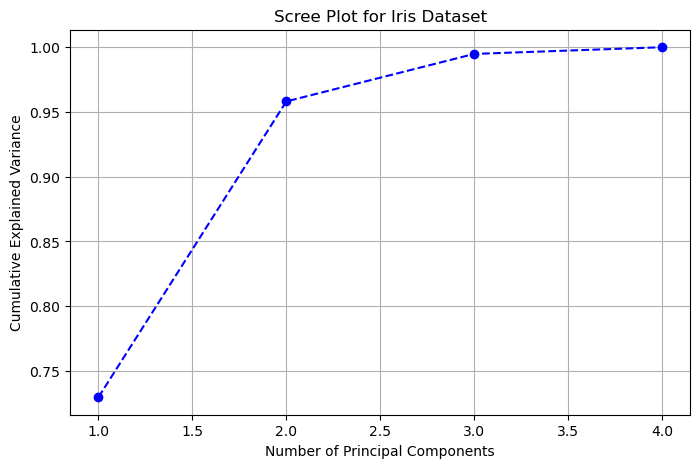

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 5), iris_cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot for Iris Dataset')
plt.grid()
plt.show()

## Finding the optimal number of components

In [11]:
# Determine optimal number of components (threshold ~95% variance)
optimal_iris_components = np.argmax(iris_cumulative_variance >= 0.95) + 1
print(f"Optimal Number of Components for Iris: {optimal_iris_components}")

Optimal Number of Components for Iris: 2


## Performing PCA with optimal components

In [12]:
pca_iris_optimal = PCA(n_components=optimal_iris_components)
iris_pca_final = pca_iris_optimal.fit_transform(iris_scaled)

# Print explained variance
print(f"Explained Variance by {optimal_iris_components} Principal Components:", pca_iris_optimal.explained_variance_ratio_)
print(f"Total Explained Variance: {sum(pca_iris_optimal.explained_variance_ratio_)}\n")

Explained Variance by 2 Principal Components: [0.72962445 0.22850762]
Total Explained Variance: 0.9581320720000164



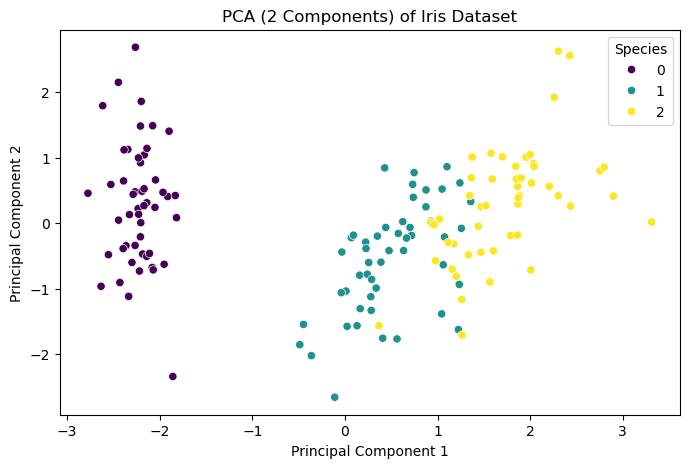

In [13]:
# 2D Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=iris_pca_final[:, 0], y=iris_pca_final[:, 1], hue=iris_labels, palette="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA (2 Components) of Iris Dataset")
plt.legend(title="Species")
plt.show()

## Conclusions and Interpretations:
- Scree Plot Result: The first 2 components explain ~95% of the variance.
- Optimal Components Chosen: 2
- Visualization: 2D PCA Scatter Plot
- The PCA scatter plot clearly separates the three species.
- PCA effectively reduces the dataset from 4D to 2D while retaining meaningful class separability.

# PCA on wine dataset

In [29]:
from sklearn.datasets import load_wine

## loading the dataset

In [16]:
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_labels = wine.target

## Standardizing the dataset

In [18]:
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_df)

In [19]:
# Perform PCA with all components
pca_wine = PCA(n_components=13)
wine_pca_transformed = pca_wine.fit_transform(wine_scaled)

In [20]:
# Explained variance analysis
wine_explained_variance = pca_wine.explained_variance_ratio_
wine_cumulative_variance = np.cumsum(wine_explained_variance)

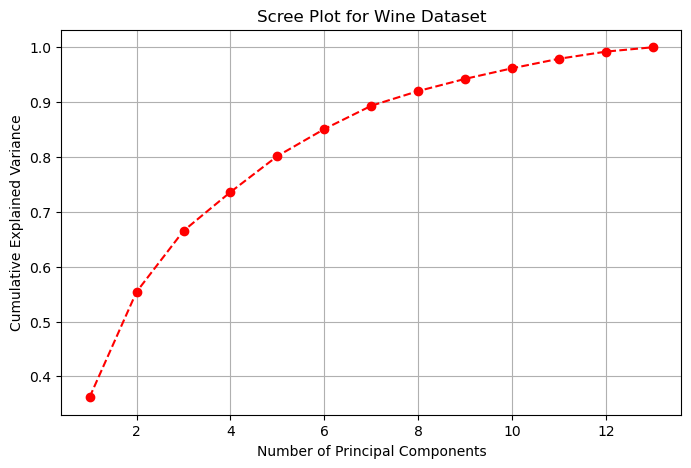

In [21]:
# Scree plot to determine optimal components
plt.figure(figsize=(8, 5))
plt.plot(range(1, 14), wine_cumulative_variance, marker='o', linestyle='--', color='r')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot for Wine Dataset')
plt.grid()
plt.show()

In [22]:
# Determine optimal number of components (threshold ~95% variance)
optimal_wine_components = np.argmax(wine_cumulative_variance >= 0.95) + 1
print(f"Optimal Number of Components for Wine: {optimal_wine_components}")

Optimal Number of Components for Wine: 10


In [23]:
# Perform PCA again with the optimal number of components
pca_wine_optimal = PCA(n_components=optimal_wine_components)
wine_pca_final = pca_wine_optimal.fit_transform(wine_scaled)

In [24]:
# Print explained variance
print(f"Explained Variance by {optimal_wine_components} Principal Components:", pca_wine_optimal.explained_variance_ratio_)
print(f"Total Explained Variance: {sum(pca_wine_optimal.explained_variance_ratio_)}\n")


Explained Variance by 10 Principal Components: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019]
Total Explained Variance: 0.9616971684450641



### Since we can't plot with 10 components so we perform PCA with 2 components, check how much variance it can explain and plot a scatter plot

In [27]:
# Perform PCA with 2 components
pca_wine_2 = PCA(n_components=2)
wine_pca_2_transformed = pca_wine_2.fit_transform(wine_scaled)

explained_variance_2 = pca_wine_2.explained_variance_ratio_
total_variance_2 = sum(explained_variance_2)

print(f"Variance explained by the first 2 components: {explained_variance_2}")
print(f"Total variance explained by 2 components: {total_variance_2:.4f}")

Variance explained by the first 2 components: [0.36198848 0.1920749 ]
Total variance explained by 2 components: 0.5541


## Only 55.4% of total variance is explained by the 2 components, which is not effective

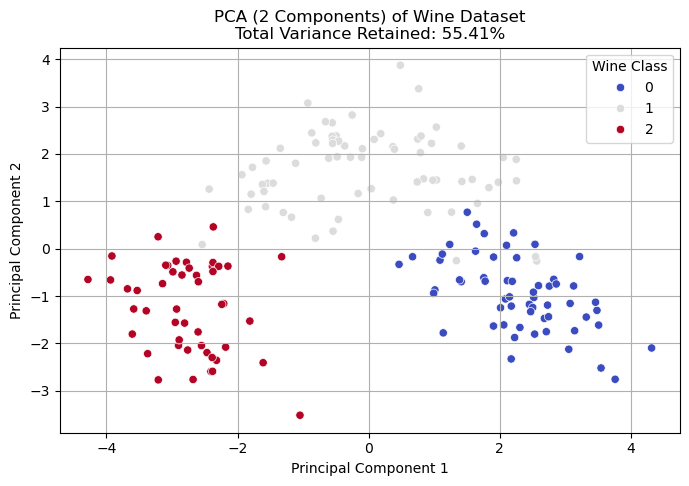

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=wine_pca_2_transformed[:, 0], y=wine_pca_2_transformed[:, 1], hue=wine_labels, palette="coolwarm")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"PCA (2 Components) of Wine Dataset\nTotal Variance Retained: {total_variance_2:.2%}")
plt.legend(title="Wine Class")
plt.grid()
plt.show()

## Conclusion and interpretations:
- The scree plot analysis showed that 10 principal components retain ~95% of the variance.
- This means reducing the dataset from 13D to 10D preserves most of the information.
- PCA with Only 2 Components
    - Explained variance of the first 2 components: ~55.41%.
    - This means 44.59% of the information is lost, which could impact classification performance.
- Scatter Plot Insights (PCA with 2 Components)
    - The scatter plot shows some separation among the three wine classes.
    - However, overlapping is visible, indicating that two components are not sufficient for perfect class separability.
- The original dataset had 13 features, and reducing to 2 components loses important discriminatory features.

# PCA on Breast Cancer Dataset

In [30]:
from sklearn.datasets import load_breast_cancer

### Loading the dataset

In [34]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_labels = cancer.target  # 0 = Malignant, 1 = Benign

cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Standardizing the dataset

In [33]:
scaler = StandardScaler()
cancer_scaled = scaler.fit_transform(cancer_df)

In [35]:
# Perform PCA with all components
pca_cancer = PCA(n_components=cancer_df.shape[1])
cancer_pca_transformed = pca_cancer.fit_transform(cancer_scaled)


In [40]:
# Explained variance analysis
cancer_explained_variance = pca_cancer.explained_variance_ratio_
cancer_cumulative_variance = np.cumsum(cancer_explained_variance)


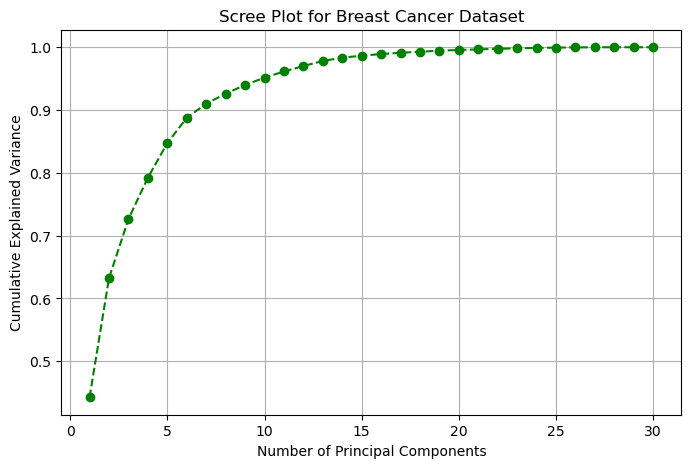

In [41]:
# Scree plot to determine optimal components
plt.figure(figsize=(8, 5))
plt.plot(range(1, cancer_df.shape[1] + 1), cancer_cumulative_variance, marker='o', linestyle='--', color='g')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot for Breast Cancer Dataset')
plt.grid()
plt.show()

In [42]:
# Determine optimal number of components (threshold ~95% variance)
optimal_cancer_components = np.argmax(cancer_cumulative_variance >= 0.95) + 1
print(f"Optimal Number of Components for Breast Cancer: {optimal_cancer_components}")

Optimal Number of Components for Breast Cancer: 10


## Performing PCA with 2 components

In [43]:
pca_cancer_2 = PCA(n_components=2)
cancer_pca_2_transformed = pca_cancer_2.fit_transform(cancer_scaled)

# Get explained variance
explained_variance_2 = pca_cancer_2.explained_variance_ratio_
total_variance_2 = sum(explained_variance_2)

print(f"Variance explained by the first 2 components: {explained_variance_2}")
print(f"Total variance explained by 2 components: {total_variance_2:.4f}")

Variance explained by the first 2 components: [0.44272026 0.18971182]
Total variance explained by 2 components: 0.6324


## Only 63.2% of total variance is explained by the 2 components, which is not effective

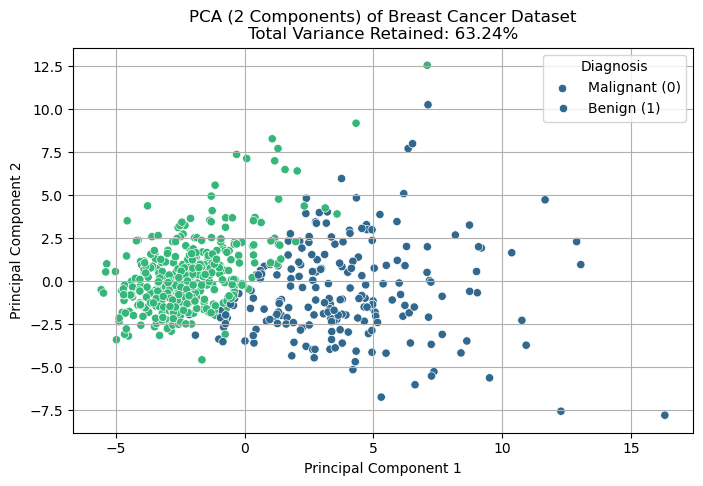

In [45]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=cancer_pca_2_transformed[:, 0], y=cancer_pca_2_transformed[:, 1], hue=cancer_labels, palette="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"PCA (2 Components) of Breast Cancer Dataset\nTotal Variance Retained: {total_variance_2:.2%}")
plt.legend(title="Diagnosis", labels=["Malignant (0)", "Benign (1)"])
plt.grid()
plt.show()

## Conclusions and Interpretations:
- The scree plot shows that the first 10 components retain ~95% of the variance.
- This means reducing the dataset from 30D to 10D preserves most of the information.
- PCA with Only 2 Components
    - Explained variance of the first 2 components: ~63%.
    - This means 37% of the information is lost, which could impact classification accuracy.
- The scatter plot shows almost clear separation with some overlapping points between malignant (0) and benign (1) tumors.